In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']='True'
plt.rcParams['ytick.minor.visible']='True'

In [13]:
iters=[]
try:
    uspdev=np.loadtxt('uspmciters/mc_iters_0.txt')[0,0]
except:
    print(j)
for i in range(100):
    try:
        iters.append(np.loadtxt('uspmciters/mc_iters_'+str(i)+'.txt')[:,1].tolist())
    except: 
        print(i)
        continue
iters=np.concatenate(iters)
iters=pd.Series(iters)
print(len(iters))
print(len(iters.loc[iters<uspdev])/len(iters))

100000
0.59823


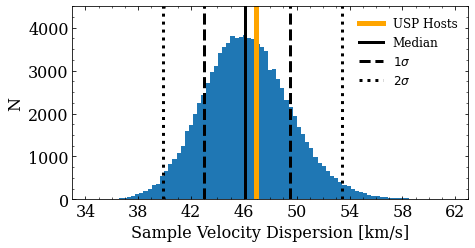

In [18]:
font={'size':16, 'family':'serif'}
plt.rc('font',**font)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.1,7.1*.5))

ax.hist(iters, bins = 100)
ax.axvline(uspdev, label = 'USP Hosts',lw=5, color='orange')
#plt.vlines(so_only_uspdev, ymin = 0, ymax = maxy, label = 'USP Total Dev', color = 'orange',lw=10)
ax.axvline(x = np.percentile(iters,50), label = 'Median', lw=3,color = 'k')
ax.axvline(x = np.percentile(iters,16,), lw=3,color = 'k', linestyle = '--', label='$1 \sigma$')
ax.axvline(x = np.percentile(iters,84), lw=3,color = 'k', linestyle = '--')
ax.axvline(x = np.percentile(iters,2), lw=3,color = 'k', linestyle = ':', label='$2 \sigma$')
ax.axvline(x = np.percentile(iters,98), lw=3,color = 'k', linestyle = ':')
ax.set_xlabel('Sample Velocity Dispersion [km/s]')
ax.set_ylabel('N')
ax.legend(fontsize=12, frameon=False)
ax.set_xlim(33,63)
ax.set_ylim(None,4500)
ax.set_xticks(np.arange(34,64,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(top=True, left=True, right=True, bottom=True, which='both')

# ax[1].hist(iters2, bins = 100)
# ax[1].axvline(so_only_uspdev2, label = 'Jupiter Hosts',lw=5, color='orange')
# ax[1].axvline(x = np.percentile(iters2,50), label = 'Median', lw=3,color = 'k')
# ax[1].axvline(x = np.percentile(iters2,16,), lw=3,color = 'k', linestyle = '--',label='$1 \sigma$')
# ax[1].axvline(x = np.percentile(iters2,84), lw=3,color = 'k', linestyle = '--')
# ax[1].axvline(x = np.percentile(iters2,2), lw=3,color = 'k', linestyle = ':',label='$2 \sigma$')
# ax[1].axvline(x = np.percentile(iters2,98), lw=3,color = 'k', linestyle = ':')
# ax[1].set_xlabel('Sample Velocity Dispersion [km/s]')
# ax[1].set_ylabel('N')
# ax[1].legend(fontsize=12, frameon=False)
# #ax[1].set_xlim(35.75,51)
# ax[1].set_xticks(np.arange(36,52,2))
# ax[1].yaxis.set_major_locator(MultipleLocator(100))
# ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
# ax[1].yaxis.set_minor_locator(AutoMinorLocator(4))
# ax[1].tick_params(top=True, left=True, right=True, bottom=True, which='both')
# plt.tight_layout()

plt.savefig('PaperPlots/so_only_usp_hist.png',bbox_inches='tight', dpi=300)
plt.savefig('PaperPlots/so_only_usp_hist.pdf',bbox_inches='tight')

In [4]:
# fracs=[]
# alliters=[]
# allhjs=[]
# for j in range(100):
#     iters=[]
#     try:
#         hjdev=np.loadtxt('mciters/hj_samp_'+str(j)+'/mc_iters.txt')[0,0]
#         allhjs.append(hjdev)
#     except:
#         print(j)
#     for i in range(20):
#         try:
#             iters.append(np.loadtxt('mciters/hj_samp_'+str(j)+'/mc_iters.txt')[:,1].tolist())
#         except: 
#             print(j, i)
#             continue
#     iters=np.concatenate(iters)
#     alliters.append(iters)
#     iters=pd.Series(iters)
#     fracs.append(len(iters.loc[iters<hjdev])/len(iters))
# fracs=pd.Series(fracs)
# alliters=np.concatenate(alliters)

In [5]:
fracs=[]
alliters=[]
allhjs=[]
for j in range(1000):
    try:
        hjdev=np.loadtxt('mciters/hj_samp_'+str(j)+'/mc_iters.txt')[0,0]
        allhjs.append(hjdev)
    except:
        print(j)
    try:
        iters=np.loadtxt('mciters/hj_samp_'+str(j)+'/mc_iters.txt')[:,1].tolist()
    except: 
        print(j)
    alliters.append(iters)
    iters=pd.Series(iters)
    fracs.append(len(iters.loc[iters<hjdev])/len(iters))
fracs=pd.Series(fracs)
alliters=np.concatenate(alliters)

Text(0.5, 0, 'Percentile')

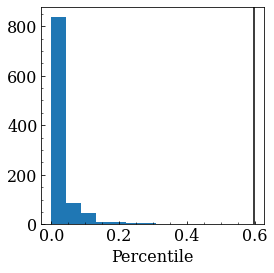

In [6]:
plt.figure(figsize=(4,4))
plt.hist(fracs, bins=10)
plt.axvline(x=.598, c='k')
plt.xlabel('Percentile', fontsize=16, fontfamily='serif')

In [7]:
print('Number of subsamples for which the HJ hosts are 1 sigma kinematically cooler:', len(fracs[fracs<.15866]))
print('Number of subsamples for which the HJ hosts are 2 sigma kinematically cooler:', len(fracs[fracs<.02275]))
print('Number of subsamples for which the HJ hosts are 3 sigma kinematically cooler:', len(fracs[fracs<.00135]))

Number of subsamples for which the HJ hosts are 1 sigma kinematically cooler: 973
Number of subsamples for which the HJ hosts are 2 sigma kinematically cooler: 713
Number of subsamples for which the HJ hosts are 3 sigma kinematically cooler: 233


In [8]:
print('Number of subsamples for which the HJ hosts are as relatively warm as the USPs:', len(fracs[fracs>.598]))

Number of subsamples for which the HJ hosts are as relatively warm as the USPs: 0


(array([1.57184178e-05, 8.58467436e-05, 2.15221414e-04, 7.47229402e-04,
        1.90192856e-03, 4.48700374e-03, 9.54470696e-03, 1.84763956e-02,
        3.20619451e-02, 4.98056206e-02, 7.23917779e-02, 9.40977039e-02,
        1.12403615e-01, 1.25579277e-01, 1.28704824e-01, 1.22354583e-01,
        1.10669753e-01, 9.24255060e-02, 7.17436955e-02, 5.45888561e-02,
        3.83166663e-02, 2.62715218e-02, 1.70061190e-02, 1.04140564e-02,
        6.17733821e-03, 3.81836643e-03, 2.12319552e-03, 1.20306352e-03,
        6.90401276e-04, 3.90542228e-04, 1.78948142e-04, 9.91469433e-05,
        6.40827804e-05, 2.41821813e-05, 1.69275269e-05, 6.04554532e-06,
        4.83643626e-06, 1.20910906e-06, 0.00000000e+00, 1.20910906e-06]),
 array([30.73782411, 31.56487936, 32.39193461, 33.21898986, 34.04604511,
        34.87310036, 35.70015561, 36.52721086, 37.35426611, 38.18132136,
        39.00837661, 39.83543186, 40.66248711, 41.48954236, 42.31659761,
        43.14365286, 43.97070811, 44.79776336, 45.62481861,

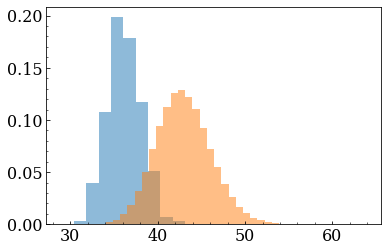

In [9]:
plt.hist(allhjs, bins=10, alpha=0.5, density=True)
plt.hist(alliters, bins=40, alpha=0.5, density=True)